## EN2550 Assignment 1 
### 190484T - Rajapaksha R.M.P.A.P.

In [2]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## Question 1

Text(0.5, 1.0, 'Transformed Image')

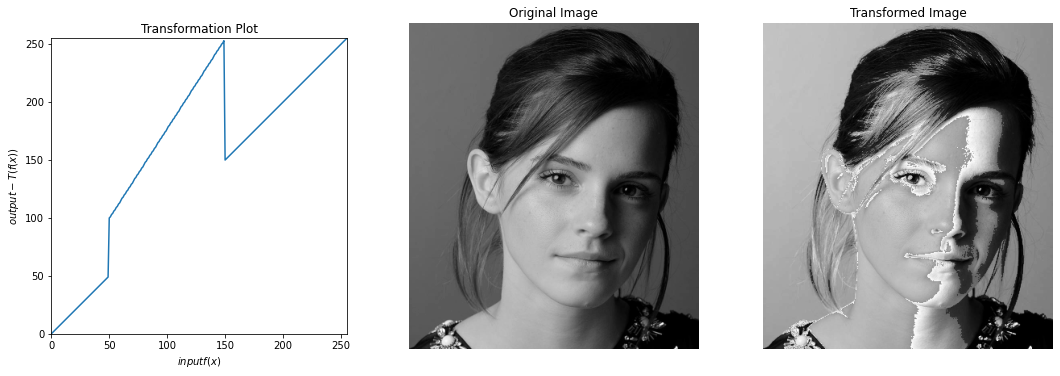

In [13]:
# ************************ question 1 **************************

# opening the image 
im = cv.imread("emma_gray.jpg", cv.IMREAD_REDUCED_GRAYSCALE_2)

# creating the transform 
t1 = np.arange(0, 50, 1)
t2 = np.arange(100, 255, 155/100)
t3 = np.arange(150, 255+1, 1)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

# perform the intensity transformation 
im_trans = cv.LUT(im, t)

# plotting the transform and visualizing images 
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
ax[0].plot(t)
ax[0].set_xlim(0, 255); ax[0].set_ylim(0, 255)
ax[0].set_xlabel("$input f(x)$"); ax[0].set_ylabel("$output - T(f(x))$")
ax[0].set_aspect("equal")
ax[0].set_title("Transformation Plot")

ax[1].imshow(im, cmap = 'gray')
ax[1].axis('off')
ax[1].set_title("Original Image")

ax[2].imshow(im_trans, cmap = 'gray')
ax[2].axis('off')
ax[2].set_title("Transformed Image")

## Question 2

The pixel intensity range for white and gray matter can be decided by using trackbars provided by OpenCV. 

Here, the pixel intensity range of [184, 255] is roughly occupied by white matter, and the range of [134, 180] is for gray matter.

Therefore, to accentuate a particular region, the other intensity values can be mapped to black. 

Text(0.5, 1.0, 'Gray Matter Accentuated')

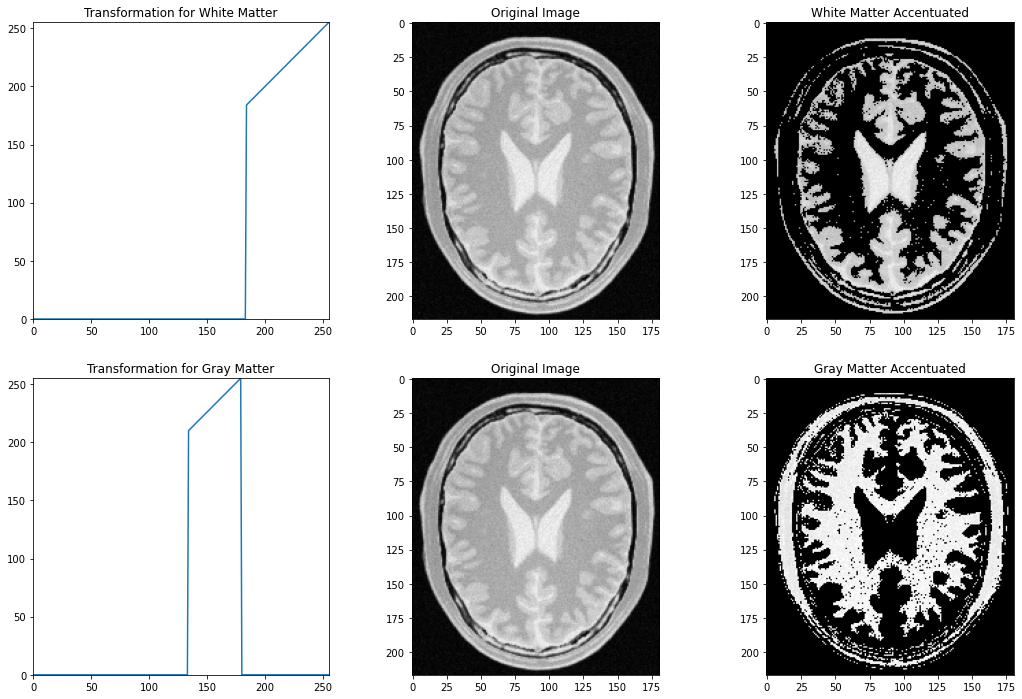

In [15]:
# intensity transformation for white matter 
arr = list(range(256))
for i in range(184): arr[i] = 0
t_w = np.array(arr)

# applying the transformation
white_matter = cv.LUT(im, t_w)

# intensity transformation for gray matter 
arr = list(range(256))
for i in range(134): arr[i] = 0
for i in range(134, 181): arr[i] += (256-180)
for i in range(181, 256): arr[i] = 0
t_g = np.array(arr).astype(np.uint8)

# applying the transformation
gray_matter = cv.LUT(im, t_g)

fig, ax = plt.subplots(2, 3, figsize = (18, 12))

ax[0, 0].plot(t_w); ax[0, 0].set_xlim(0, 255); ax[0, 0].set_ylim(0, 255)
ax[0, 0].set_title("Transformation for White Matter")
ax[0, 1].imshow(im, cmap='gray', vmin=0, vmax=255); 
ax[0, 1].set_title("Original Image")
ax[0, 2].imshow(white_matter, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title("White Matter Accentuated")

ax[1, 0].plot(t_g); ax[1, 0].set_xlim(0, 255); ax[1, 0].set_ylim(0, 255)
ax[1, 0].set_title("Transformation for Gray Matter")
ax[1, 1].imshow(im, cmap='gray', vmin=0, vmax=255); 
ax[1, 1].set_title("Original Image")
ax[1, 2].imshow(gray_matter, cmap='gray', vmin=0, vmax=255)
ax[1, 2].set_title("Gray Matter Accentuated")

## Question 3

### part (a)

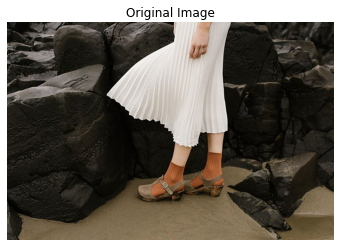

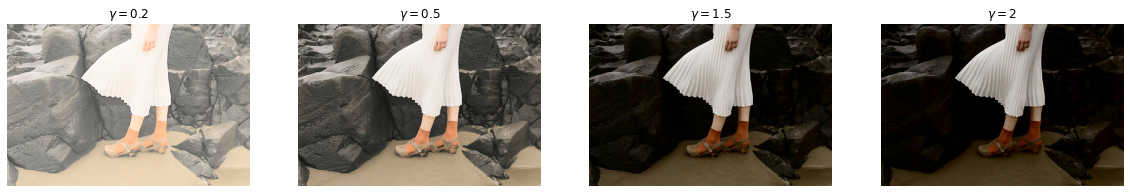

In [71]:
# open the image and convert it into the LAB plane.
im_BGR = cv.imread("highlights_and_shadows.jpg")
im_RGB = cv.cvtColor(im_BGR, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(im_RGB); ax.set_title("Original Image"); ax.axis('off')
im_LAB = cv.cvtColor(im_RGB, cv.COLOR_RGB2LAB)

fig, ax = plt.subplots(1, 4, figsize = (20, 10))
gamma_list = [0.2, 0.5, 1.5, 2]
hist_list = []
for i in range(4):
    # creating the gamma transform
    gamma = gamma_list[i]
    transform = np.array([(pixel/255)**gamma*255 for pixel in range(256)]).astype(np.uint8)

    # apply the gamma correction to the L plane.
    im_gamma_LAB = im_LAB.copy()
    im_gamma_LAB[:, :, 0] = cv.LUT(im_LAB[:, :, 0], transform)

    # converting the image into RGB plane.
    im_gamma_RGB = cv.cvtColor(im_gamma_LAB, cv.COLOR_LAB2RGB)

    ax[i].imshow(im_gamma_RGB); ax[i].set_title("$\gamma = %g$" %gamma); ax[i].axis('off')

    hist = cv.calcHist([im_gamma_LAB[:, :, 0]], [0], None, [255], [0,256])
    hist_list.append(hist)

### part (b)

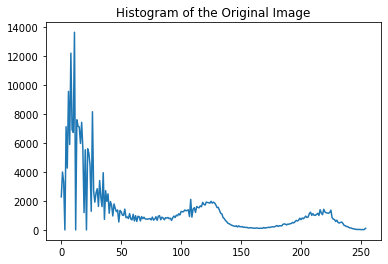

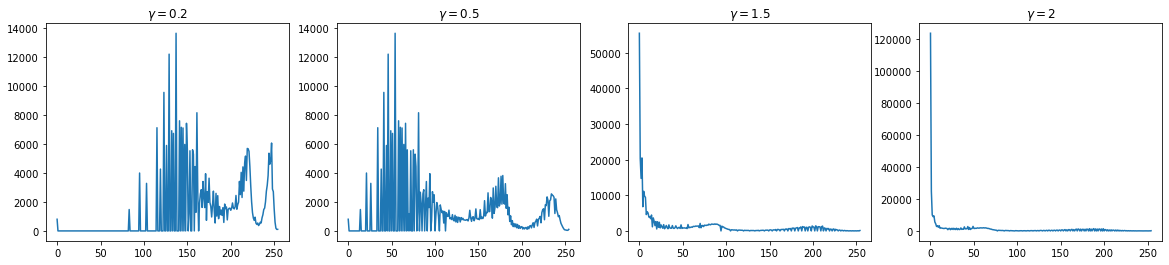

In [74]:
# plotting the histograms of the L plane of the images.
hist_org = cv.calcHist([im_LAB[:, :, 0]], [0], None, [255], [0,256])
fig, ax = plt.subplots(); ax.plot(hist_org); ax.set_title("Histogram of the Original Image")

fig, ax = plt.subplots(1, 4, figsize = (20, 4))
for i in range(4):
    ax[i].plot(hist_list[i])
    ax[i].set_title("$\gamma = %g$" %gamma_list[i])

## Question 4

In [3]:
# creating the transformation function 
def customHistogramEqulization(image):
    # returns Histogram Equlized Version of an 8-bit grayscale image
    count = np.array([(im == p).sum() for p in range(256)])
    for i in range(1, 256): count[i] += count[i-1]
    t = ((256-1)/image.size * count).astype(np.uint8)

    hist_equalized = cv.LUT(image, t)
    return hist_equalized

(-0.5, 499.5, 499.5, -0.5)

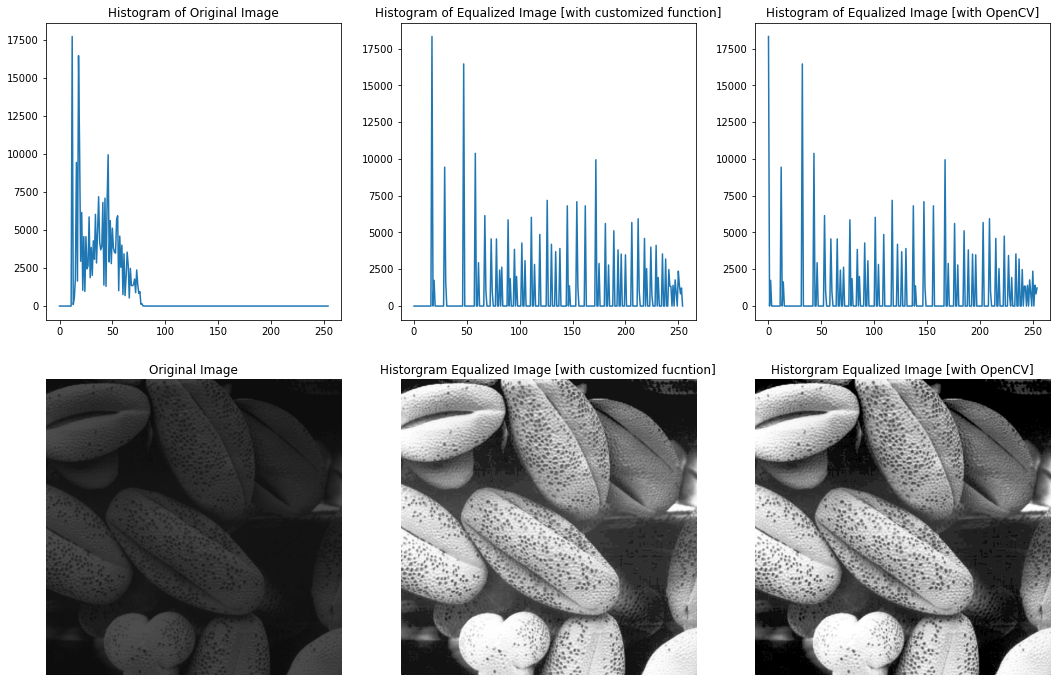

In [10]:
im = cv.imread("shells.png", cv.IMREAD_GRAYSCALE)
im_hist_equalized_custom = customHistogramEqulization(im) # using custom function
im_hist_equalized_cv = cv.equalizeHist(im)                # using opencv

hist_org = cv.calcHist([im], [0], None, [255], [0,256])
hist_equal_cust = cv.calcHist([im_hist_equalized_custom], [0], None, [255], [0,256])
hist_equal_cv = cv.calcHist([im_hist_equalized_cv], [0], None, [255], [0,256])

fig, ax = plt.subplots(2, 3, figsize=(18,12))

ax[0,0].plot(hist_org)
ax[0,0].set_title("Histogram of Original Image")

ax[0,1].plot(hist_equal_cust)
ax[0,1].set_title("Histogram of Equalized Image [with customized function]")

ax[0,2].plot(hist_equal_cv)
ax[0,2].set_title("Histogram of Equalized Image [with OpenCV]")

ax[1,0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title("Original Image")
ax[1,0].axis('off')

ax[1,1].imshow(im_hist_equalized_custom, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title("Historgram Equalized Image [with customized fucntion]")
ax[1,1].axis('off')

ax[1,2].imshow(im_hist_equalized_cv, cmap='gray', vmin=0, vmax=255)
ax[1,2].set_title("Historgram Equalized Image [with OpenCV]")
ax[1,2].axis('off')

## Question 6

### part (a)

Text(0.5, 1.0, 'Sobel Filtered Image [with OpenCV]')

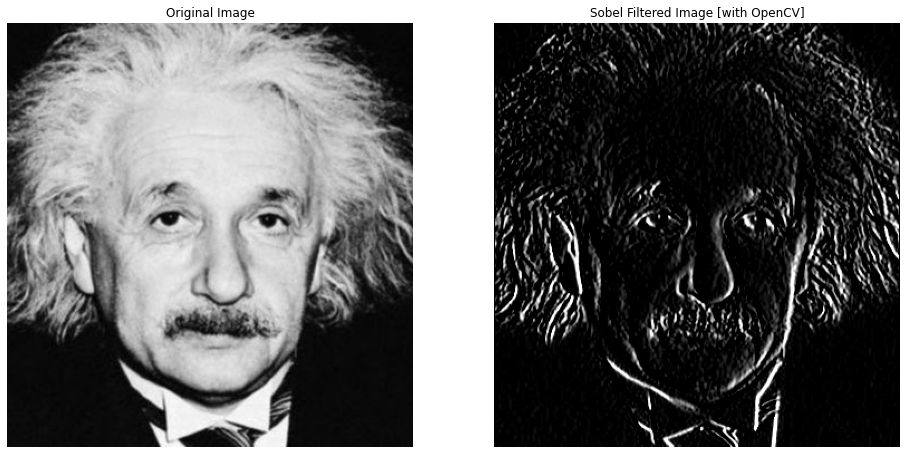

In [75]:
# opening the image
im = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)

# applying the veritcal sobel filter with OpenCV function "filter2D"
sobel_vert = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
filtered_im = cv.filter2D(im, -1, sobel_vert)

# visulaizing the images
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
ax[0].imshow(im, cmap = 'gray')
ax[0].axis('off'); ax[0].set_title("Original Image")
ax[1].imshow(filtered_im, cmap = 'gray')
ax[1].axis('off'); ax[1].set_title("Sobel Filtered Image [with OpenCV]")

- In the above case, we do not necessarily have to set the `vmin` and `vmax` parameters in `filter2D` function to $-1020$ and $1020$ (as we did in the inclass activities). 
- Since the `ddepth` parameter is set to $-1$, the output image will have the same depth (i.e. same resolution) as the input image. 
- Therefore, the pixel value in the `filtered_im` is already in the range $[0, 255]$ (not from $-1020$ to $1020$). 

### part (b)

#### Algorithm of `customFilter` function 
- step 1 - zero pad the boundary of the image
- step 2 - compute the correlation (not convolution) of the image and the kernel
- step 3 - mapping the magnitudes of the resulted pixel values into the 8-bit unsigned value range [0, 255].

In [70]:
def customFilter(img, kernel):
    "return the sobel fitered (uint8) image with the specified kernel"
    x, y = img.shape
    x_k, y_k = kernel.shape

    # perform zero padding 
    pad_tb = np.zeros((x_k//2, y)) 
    pad_lr = np.zeros((x+(x_k//2)*2, (y_k//2)))
    img_padded = np.concatenate((pad_tb, img, pad_tb), axis = 0)
    img_padded = np.concatenate((pad_lr, img_padded, pad_lr), axis = 1)

    img_filtered = np.zeros(img.shape)
    # computing correlation between image and the kernel (not convolution)
    for i in range(x):
        I = i + x_k//2
        for j in range(y):
            J = j + y_k//2
            window = img_padded[I-x_k//2:I+x_k//2+1, J-y_k//2:J+y_k//2+1]
            img_filtered[i, j] = np.sum(window*kernel)

    # mapping the pixel values into the 8-bit value range [0, 255].
    img_filtered = np.abs(img_filtered)
    min = np.min(img_filtered)
    max = np.max(img_filtered)
    img_filtered -= min
    img_filtered *= (255/(max-min))
    img_filtered = img_filtered.astype(np.uint8); b = img_filtered
    
    return img_filtered

(-0.5, 363.5, 379.5, -0.5)

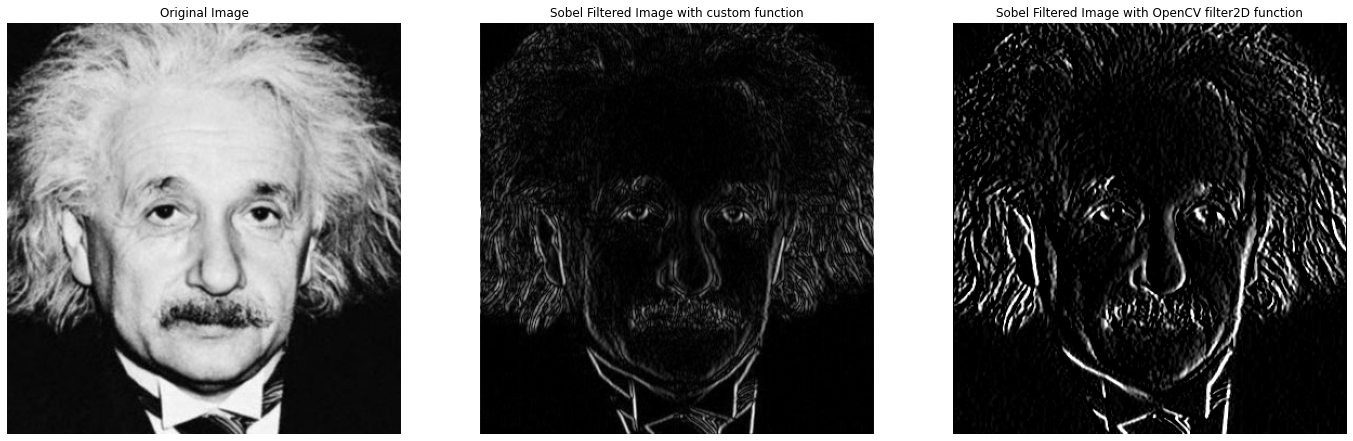

In [76]:
# generating the sobel filtered image using customFilter function 
custom_filtered_im = customFilter(im, sobel_vert)

# visualizing the images
fig, ax = plt.subplots(1, 3, figsize = (24, 8))
ax[0].imshow(im, cmap = 'gray'); ax[0].set_title("Original Image"); ax[0].axis('off')
ax[1].imshow(custom_filtered_im, cmap = 'gray'); ax[1].set_title("Sobel Filtered Image with custom function"); ax[1].axis('off')
ax[2].imshow(filtered_im, cmap = 'gray'); ax[2].set_title("Sobel Filtered Image with OpenCV filter2D function"); ax[2].axis('off')

### part (c)

The same effect obtained by applying the sobel vertical kernel on an image can be again achieved by firstly applying the sobel_col kernel to the image and then, correlating the sobel_row on the resulting image. 


(-0.5, 363.5, 379.5, -0.5)

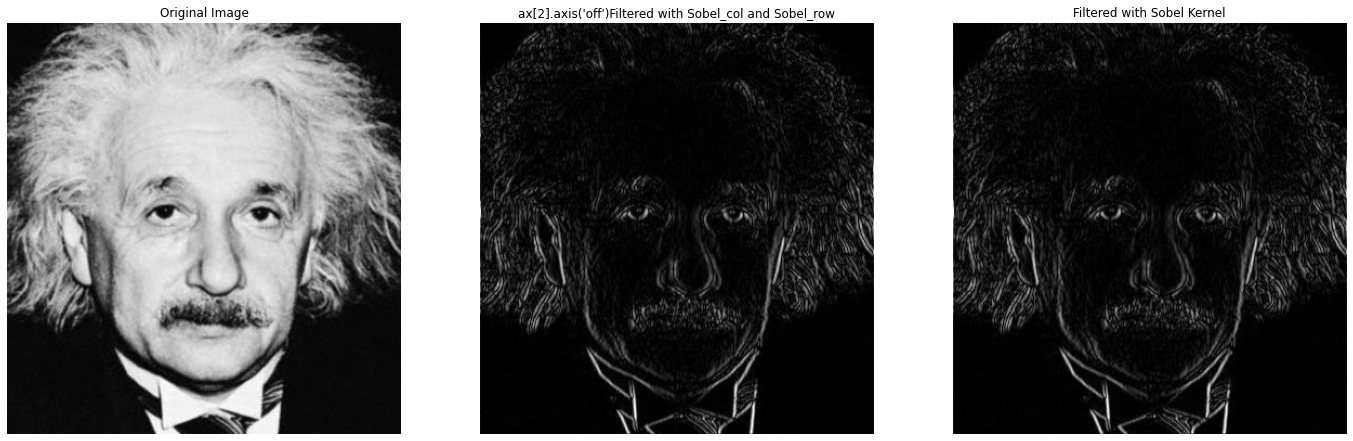

In [92]:
sobel_col = np.array([[1],
                    [2],
                    [1],])
sobel_row = np.array([[1, 0, -1]])
img1 = customFilter(im, sobel_col)
img2 = customFilter(img1, sobel_row)

fig, ax = plt.subplots(1, 3, figsize = (24, 8))
ax[0].imshow(im, cmap = 'gray'); ax[0].set_title("Original Image"); ax[0].axis('off')
ax[1].imshow(img2, cmap = 'gray'); ax[1].set_title("ax[2].axis('off')Filtered with Sobel_col and Sobel_row"); ax[1].axis('off')
ax[2].imshow(custom_filtered_im, cmap = 'gray'); ax[2].set_title("Filtered with Sobel Kernel"); ax[2].axis('off')


## Question 7

### part (a)

- Here, I have selected the *yellow color flower* as the *foreground* of the image, and everything else (including the flower bud and the flower stem) as the background. 
- Since the foreground (the flower) has a completely different color than the background, seperating the foreground from the image can be simply carried out by the **rectangular mode** in the `grabCut` function. There is no need to go to the **fine touchup mode** where we seperately indicate the parts that have to be included in and excluded from the foreground. 
- We can use trackbars in OpenCV to find the appropriate coordinates of the foreground rectangle. (the code is given in the cell number $17$) 
- Here, in this case, the rectangle with the top left corner $(54, 140)$ and the bottom left corner $(558, 544)$ completely covers the foreground region. 

In [19]:
def doNothing(val): 
    pass 

# open the image 
im = cv.imread("daisy.jpg")
mask = np.zeros(im.shape[:2], dtype = np.uint8)
bdgModel = np.zeros((1, 65), dtype = np.float32)
fdgModel = np.zeros((1, 65), dtype = np.float32)

# create a set of trackbars to real-time adjust the foregroud rectangle.
cv.namedWindow("Trackbars"); cv.resizeWindow("Trackbars", 700, 160)
cv.createTrackbar("top right X", "Trackbars", 0, im.shape[1], doNothing)
cv.createTrackbar("top right Y", "Trackbars", 0, im.shape[0], doNothing)
cv.createTrackbar("bot left X", "Trackbars", im.shape[1], im.shape[1], doNothing)
cv.createTrackbar("bot left Y", "Trackbars", im.shape[0], im.shape[0], doNothing)

while True:
    x1 = cv.getTrackbarPos("top right X", "Trackbars")
    y1 = cv.getTrackbarPos("top right Y", "Trackbars")
    x2 = cv.getTrackbarPos("bot left X", "Trackbars")
    y2 = cv.getTrackbarPos("bot left Y", "Trackbars")

    rect = im[y1:y2, x1:x2]
    cv.imshow("Foreground Rectangle", rect)
    
    key = cv.waitKey(1) 
    if key == 27: break

cv.destroyAllWindows()

(-0.5, 560.5, 840.5, -0.5)

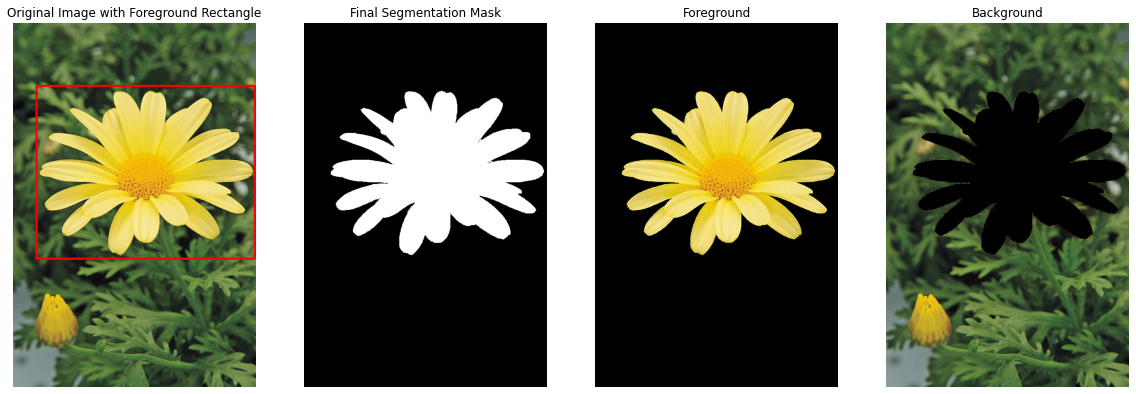

In [49]:
# extracting the foreground and the background
im = cv.imread("daisy.jpg")
mask = np.zeros(im.shape[:2], dtype = np.uint8)
bgdModel = np.zeros((1, 65), dtype = np.float64)
fgdModel = np.zeros((1, 65), dtype = np.float64)
# defining the corners of the foreground rectangle taken from the trackbar values. 
rect = (54, 146, 558-54, 544-146)
foreground_rect = cv.rectangle(im.copy(), (54, 145), (558, 544), (0, 0, 255), 3)

# applying the grabCut algo on the image over 5 iterations with rectangular mode.
cv.grabCut(im, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

""" in the resulted mask, pixel values are mapped as follows. 
        0 -> background,
        1 -> foreground,
        2 -> probable background,
        3 -> probable foreground    """ 
# creating the mask with foreground with 1 pixels and background with 0 pixels. 
endmask = np.where((mask == 0)|(mask == 2), 0, 1).astype(np.uint8)

# filter out the foreground from the image by multiplying the image with the endmask.
foreground_im = im * endmask[:, :, np.newaxis]
# filter out the background of the image by susbtracting the foreground. 
background_im = im - foreground_im

# converting the images from BGR plane to RGB plane.
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
foreground_rect = cv.cvtColor(foreground_rect, cv.COLOR_BGR2RGB)
foreground_im = cv.cvtColor(foreground_im, cv.COLOR_BGR2RGB)
background_im = cv.cvtColor(background_im, cv.COLOR_BGR2RGB)

# visualizing images 
fig, ax = plt.subplots(1, 4, figsize = (20, 8))
ax[0].imshow(foreground_rect); ax[0].set_title("Original Image with Foreground Rectangle"); ax[0].axis('off')
ax[1].imshow(endmask, cmap = 'gray', vmin = 0, vmax = 1); ax[1].set_title("Final Segmentation Mask"); ax[1].axis('off')
ax[2].imshow(foreground_im); ax[2].set_title("Foreground"); ax[2].axis('off')
ax[3].imshow(background_im); ax[3].set_title("Background"); ax[3].axis('off')


### part (b)

- To add a blur effect to the background of the image, we can apply Guassian Blur explicitly to the seperated background image. 
- This can be simply achieved by using the OpenCV `GaussianBlur` function. 

(-0.5, 560.5, 840.5, -0.5)

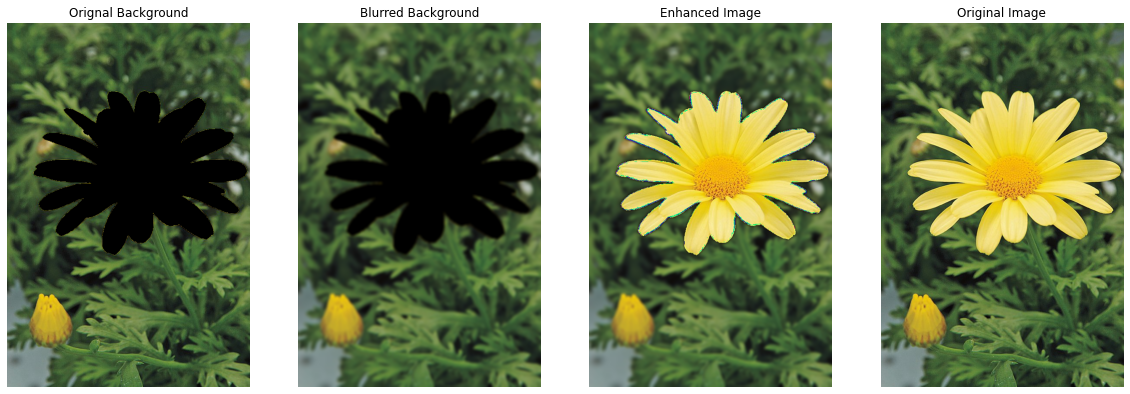

In [56]:
# applying the Gaussian Blur to the background image.
k_size = 11 # size of the Gussian kernel
sigma = 3  # standard deviation of the Gaussian Distribution 
blured_bgd = cv.GaussianBlur(background_im, [k_size, k_size], sigma)

# adding the blurred background with the foreground 
blured_img = foreground_im + blured_bgd

# visualizing the images 
fig, ax = plt.subplots(1, 4, figsize = (20, 8))
ax[0].imshow(background_im); ax[0].set_title("Orignal Background"); ax[0].axis('off')
ax[1].imshow(blured_bgd); ax[1].set_title("Blurred Background"); ax[1].axis('off')
ax[2].imshow(blured_img); ax[2].set_title("Enhanced Image"); ax[2].axis('off')
ax[3].imshow(im); ax[3].set_title("Original Image"); ax[3].axis('off')

### part (c)

- In the enhanced image, around the foreground (the flower), there is a slight distortion (a darker line).
- This is caused by the fact that, when blurring the seperated background, the pixels in the boarder of the foreground mix with the black color in the empty foreground region. 